### 95% quantile value of Normal (0,1)

In [4]:
# qnorm(.95, mean=0, sd=1)

In [7]:
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

import pandas as pd
import scipy as sp
import seaborn as sb
loc=0
scale=1
size=10000
arr = np.random.normal(loc, scale, size)
quantile=0.95

#X axis
axis= 1
q95=np.quantile(arr, quantile)
print(q95)

1.649372317320516


### 5% quantile value of Normal (0,1)

In [4]:
# qnorm(.95, mean=0, sd=1)

In [5]:
quantile= 0.05
q05=np.quantile(arr, quantile)
print(q05)

-1.6467950615506224


### Make a vactor called smk_stat by generating 5 obs from bern(0.3)
## rinom()

In [6]:
experiments = 1
ntrials=5
p=0.3
v=np.random.binomial(experiments,  p)


index_values=['Smoker','second','third']
column_values=['smk_stat']

df= pd.DataFrame(data=v, 
                 index=index_values, 
                 columns=column_values)
print(df)

        smk_stat
Smoker         1
second         1
third          1


In [10]:
rng = np.random.default_rng(19680801)

(array([1.0000e+00, 4.0000e+00, 3.9000e+01, 1.8000e+02, 7.1700e+02,
        2.2130e+03, 5.5360e+03, 1.0788e+04, 1.6513e+04, 1.9749e+04,
        1.8368e+04, 1.3402e+04, 7.5840e+03, 3.3260e+03, 1.1900e+03,
        3.1800e+02, 5.9000e+01, 1.0000e+01, 2.0000e+00, 1.0000e+00]),
 array([3.05815397, 3.25838524, 3.45861651, 3.65884778, 3.85907904,
        4.05931031, 4.25954158, 4.45977285, 4.66000412, 4.86023538,
        5.06046665, 5.26069792, 5.46092919, 5.66116045, 5.86139172,
        6.06162299, 6.26185426, 6.46208553, 6.66231679, 6.86254806,
        7.06277933]),
 <BarContainer object of 20 artists>)

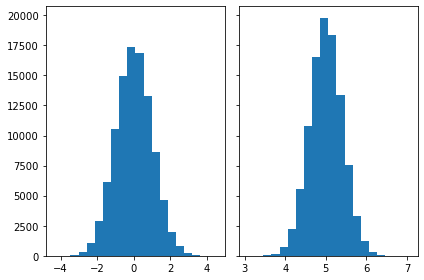

In [12]:
N_points = 100000
n_bins = 20

# Generate two normal distributions
dist1=rng.standard_normal(N_points)
dist2 = 0.4 * rng.standard_normal(N_points)+ 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

#We can set the number of bins witht he *bins* keyword argument
axs[0].hist(dist1, bins=n_bins)
axs[1].hist(dist2, bins=n_bins)


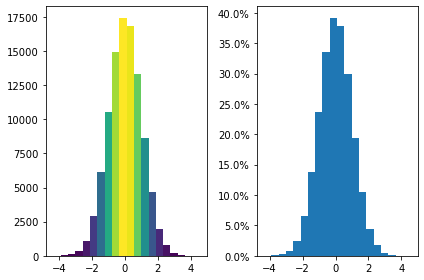

In [13]:
fig, axs = plt.subplots(1,2, tight_layout=True)

#N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(dist1, bins=n_bins)

#we'll color code by height, but you could use any scalar
fracs= N / N.max()

#We need to normalize the data to [0:1] for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

#Now, we'll loop through our objects and set the color of each accourdingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
#We can also normalize our inputs by the total number of counts
axs[1].hist(dist1, bins=n_bins, density=True)

#Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

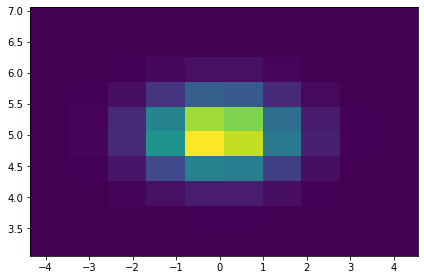

In [14]:
fix, ax = plt.subplots(tight_layout = True)
hist = ax.hist2d(dist1, dist2)

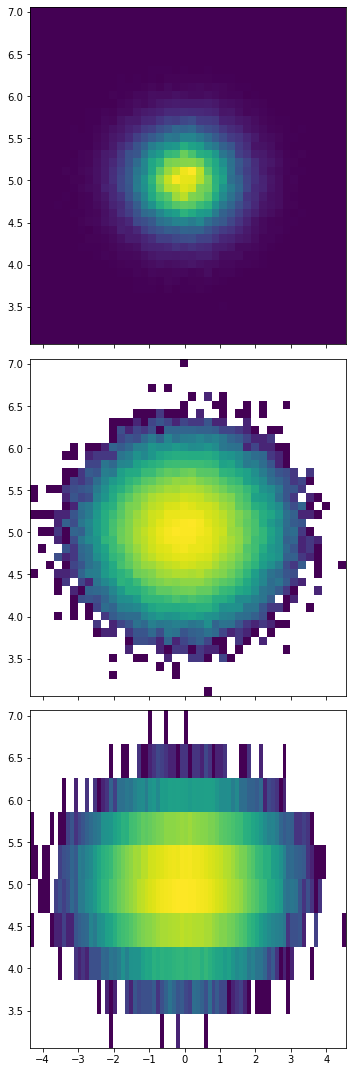

In [15]:
fig, axs = plt.subplots(3,1, figsize=(5,15), sharex = True, sharey=True, tight_layout = True)

# We can increase the number of bins on each axis
axs[0].hist2d(dist1, dist2, bins=40)

#As well as define normalization of the colors
axs[1].hist2d(dist1, dist2, bins=40, norm= colors.LogNorm())

#We can also define custom numbers of bins for each axis
axs[2].hist2d(dist1, dist2, bins=(80,10), norm=colors.LogNorm())

plt.show()

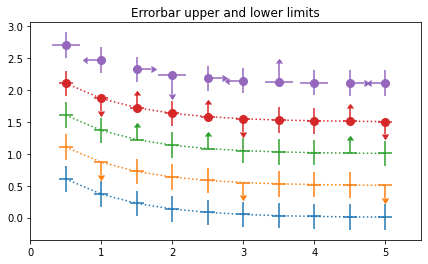

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
y = np.exp(-x)
xerr = 0.1
yerr = 0.2

# lower & upper limits of the error
lolims = np.array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0], dtype=bool)
uplims = np.array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1], dtype=bool)
ls = 'dotted'

fig, ax = plt.subplots(figsize=(7, 4))

# standard error bars
ax.errorbar(x, y, xerr=xerr, yerr=yerr, linestyle=ls)

# including upper limits
ax.errorbar(x, y + 0.5, xerr=xerr, yerr=yerr, uplims=uplims,
            linestyle=ls)

# including lower limits
ax.errorbar(x, y + 1.0, xerr=xerr, yerr=yerr, lolims=lolims,
            linestyle=ls)

# including upper and lower limits
ax.errorbar(x, y + 1.5, xerr=xerr, yerr=yerr,
            lolims=lolims, uplims=uplims,
            marker='o', markersize=8,
            linestyle=ls)

# Plot a series with lower and upper limits in both x & y
# constant x-error with varying y-error
xerr = 0.2
yerr = np.full_like(x, 0.2)
yerr[[3, 6]] = 0.3

# mock up some limits by modifying previous data
xlolims = lolims
xuplims = uplims
lolims = np.zeros_like(x)
uplims = np.zeros_like(x)
lolims[[6]] = True  # only limited at this index
uplims[[3]] = True  # only limited at this index

# do the plotting
ax.errorbar(x, y + 2.1, xerr=xerr, yerr=yerr,
            xlolims=xlolims, xuplims=xuplims,
            uplims=uplims, lolims=lolims,
            marker='o', markersize=8,
            linestyle='none')

# tidy up the figure
ax.set_xlim((0, 5.5))
ax.set_title('Errorbar upper and lower limits')
plt.show()


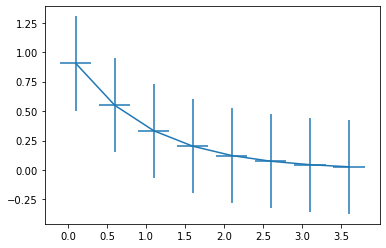

In [18]:
import numpy as np 
import matplotlib.pyplot as plt

#example data
x=np.arange(0.1, 4, 0.5)
y=np.exp(-x)

fix, ax=plt.subplots()
ax.errorbar(x,y,xerr=0.2, yerr=0.4)
plt.show()

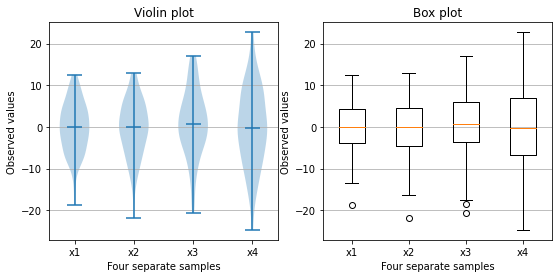

In [19]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Fixing random state for reproducibility
np.random.seed(19680801)


# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axs[0].violinplot(all_data,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Violin plot')

# plot box plot
axs[1].boxplot(all_data)
axs[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))],
                  labels=['x1', 'x2', 'x3', 'x4'])
    ax.set_xlabel('Four separate samples')
    ax.set_ylabel('Observed values')

plt.show()

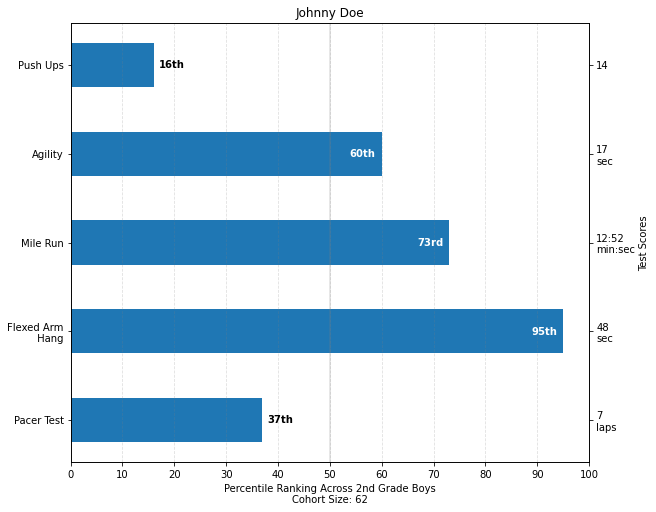

In [20]:
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt


Student = namedtuple('Student', ['name', 'grade', 'gender'])
Score = namedtuple('Score', ['value', 'unit', 'percentile'])


def to_ordinal(num):
    """Convert an integer to an ordinal string, e.g. 2 -> '2nd'."""
    suffixes = {str(i): v
                for i, v in enumerate(['th', 'st', 'nd', 'rd', 'th',
                                       'th', 'th', 'th', 'th', 'th'])}
    v = str(num)
    # special case early teens
    if v in {'11', '12', '13'}:
        return v + 'th'
    return v + suffixes[v[-1]]


def format_score(score):
    """
    Create score labels for the right y-axis as the test name followed by the
    measurement unit (if any), split over two lines.
    """
    return f'{score.value}\n{score.unit}' if score.unit else str(score.value)


def plot_student_results(student, scores_by_test, cohort_size):
    fig, ax1 = plt.subplots(figsize=(9, 7), constrained_layout=True)
    fig.canvas.manager.set_window_title('Eldorado K-8 Fitness Chart')

    ax1.set_title(student.name)
    ax1.set_xlabel(
        'Percentile Ranking Across {grade} Grade {gender}s\n'
        'Cohort Size: {cohort_size}'.format(
            grade=to_ordinal(student.grade),
            gender=student.gender.title(),
            cohort_size=cohort_size))

    test_names = list(scores_by_test.keys())
    percentiles = [score.percentile for score in scores_by_test.values()]

    rects = ax1.barh(test_names, percentiles, align='center', height=0.5)
    # Partition the percentile values to be able to draw large numbers in
    # white within the bar, and small numbers in black outside the bar.
    large_percentiles = [to_ordinal(p) if p > 40 else '' for p in percentiles]
    small_percentiles = [to_ordinal(p) if p <= 40 else '' for p in percentiles]
    ax1.bar_label(rects, small_percentiles,
                  padding=5, color='black', fontweight='bold')
    ax1.bar_label(rects, large_percentiles,
                  padding=-32, color='white', fontweight='bold')

    ax1.set_xlim([0, 100])
    ax1.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
    ax1.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)
    ax1.axvline(50, color='grey', alpha=0.25)  # median position

    # Set the right-hand Y-axis ticks and labels
    ax2 = ax1.twinx()
    # Set equal limits on both yaxis so that the ticks line up
    ax2.set_ylim(ax1.get_ylim())
    # Set the tick locations and labels
    ax2.set_yticks(
        np.arange(len(scores_by_test)),
        labels=[format_score(score) for score in scores_by_test.values()])

    ax2.set_ylabel('Test Scores')


student = Student(name='Johnny Doe', grade=2, gender='Boy')
scores_by_test = {
    'Pacer Test': Score(7, 'laps', percentile=37),
    'Flexed Arm\n Hang': Score(48, 'sec', percentile=95),
    'Mile Run': Score('12:52', 'min:sec', percentile=73),
    'Agility': Score(17, 'sec', percentile=60),
    'Push Ups': Score(14, '', percentile=16),
}

plot_student_results(student, scores_by_test, cohort_size=62)
plt.show()

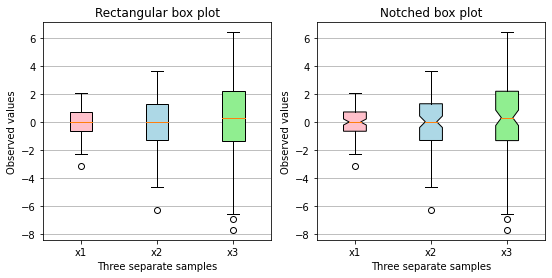

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Random test data
np.random.seed(19680801)
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['x1', 'x2', 'x3']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')

# notch shape box plot
bplot2 = ax2.boxplot(all_data,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_title('Notched box plot')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# fake data
np.random.seed(19680801)
data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)
labels = list('ABCD')

# compute the boxplot stats
stats = cbook.boxplot_stats(data, labels=labels, bootstrap=10000)

In [23]:
for n in range(len(stats)):
    stats[n]['med'] = np.median(data)
    stats[n]['mean'] *= 2

print(list(stats[0]))

fs = 10  # fontsize

['label', 'mean', 'iqr', 'cilo', 'cihi', 'whishi', 'whislo', 'fliers', 'q1', 'med', 'q3']


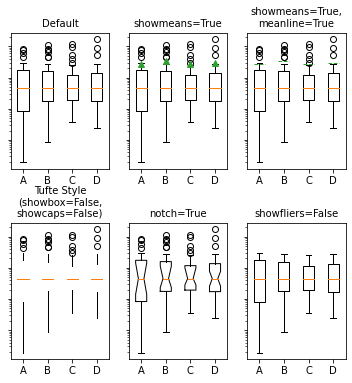

In [24]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(6, 6), sharey=True)
axs[0, 0].bxp(stats)
axs[0, 0].set_title('Default', fontsize=fs)

axs[0, 1].bxp(stats, showmeans=True)
axs[0, 1].set_title('showmeans=True', fontsize=fs)

axs[0, 2].bxp(stats, showmeans=True, meanline=True)
axs[0, 2].set_title('showmeans=True,\nmeanline=True', fontsize=fs)

axs[1, 0].bxp(stats, showbox=False, showcaps=False)
tufte_title = 'Tufte Style\n(showbox=False,\nshowcaps=False)'
axs[1, 0].set_title(tufte_title, fontsize=fs)

axs[1, 1].bxp(stats, shownotches=True)
axs[1, 1].set_title('notch=True', fontsize=fs)

axs[1, 2].bxp(stats, showfliers=False)
axs[1, 2].set_title('showfliers=False', fontsize=fs)

for ax in axs.flat:
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.subplots_adjust(hspace=0.4)
plt.show()

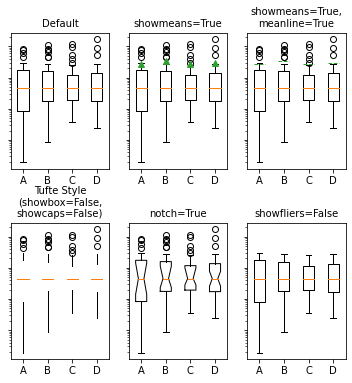

In [26]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(6, 6), sharey=True)
axs[0, 0].bxp(stats)
axs[0, 0].set_title('Default', fontsize=fs)

axs[0, 1].bxp(stats, showmeans=True)
axs[0, 1].set_title('showmeans=True', fontsize=fs)

axs[0, 2].bxp(stats, showmeans=True, meanline=True)
axs[0, 2].set_title('showmeans=True,\nmeanline=True', fontsize=fs)

axs[1, 0].bxp(stats, showbox=False, showcaps=False)
tufte_title = 'Tufte Style\n(showbox=False,\nshowcaps=False)'
axs[1, 0].set_title(tufte_title, fontsize=fs)

axs[1, 1].bxp(stats, shownotches=True)
axs[1, 1].set_title('notch=True', fontsize=fs)

axs[1, 2].bxp(stats, showfliers=False)
axs[1, 2].set_title('showfliers=False', fontsize=fs)

for ax in axs.flat:
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.subplots_adjust(hspace=0.4)
plt.show()

In [1]:
boxprops = dict(linestyle='--', linewidth=3, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')
medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6, 6), sharey=True)
axs[0, 0].bxp(stats, boxprops=boxprops)
axs[0, 0].set_title('Custom boxprops', fontsize=fs)

axs[0, 1].bxp(stats, flierprops=flierprops, medianprops=medianprops)
axs[0, 1].set_title('Custom medianprops\nand flierprops', fontsize=fs)

axs[1, 0].bxp(stats, meanprops=meanpointprops, meanline=False,
              showmeans=True)
axs[1, 0].set_title('Custom mean\nas point', fontsize=fs)

axs[1, 1].bxp(stats, meanprops=meanlineprops, meanline=True,
              showmeans=True)
axs[1, 1].set_title('Custom mean\nas line', fontsize=fs)

for ax in axs.flat:
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.suptitle("I never said they'd be pretty")
fig.subplots_adjust(hspace=0.4)
plt.show()

NameError: name 'plt' is not defined